In [1]:
!pip install --upgrade pip
!pip install seaborn

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import numpy as np

In [3]:
data = pd.read_csv('Training_Dataset_1.csv')
#data = data[:43200] # Considering only 12 hours data as it is mostly repetitive. 
data.head()

,t_stamp,P1_STATE,LIT101.Pv,FIT101.Pv,MV101.Status,P101.Status,P102.Status,P2_STATE,FIT201.Pv,AIT201.Pv,...,FIT602.Pv,P601.Status,P602.Status,P603.Status,LSH601.Alarm,LSL601.Alarm,LSH602.Alarm,LSL602.Alarm,LSH603.Alarm,LSL603.Alarm
0,2024-04-23 09:15:00,1,548.8321,0.0,1,1,1,1,0.0,230.197388,...,1.017204,1,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active
1,2024-04-23 09:15:01,1,548.8321,0.0,1,1,1,1,0.0,230.005127,...,1.005511,1,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active
2,2024-04-23 09:15:02,1,548.8321,0.0,1,1,1,1,0.0,230.005127,...,1.005511,1,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active
3,2024-04-23 09:15:03,1,548.8321,0.0,1,1,1,1,0.0,230.005127,...,1.013200,1,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active
4,2024-04-23 09:15:04,1,548.8321,0.0,1,1,1,1,0.0,230.005127,...,1.009515,1,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active


* Check for the AIT values for every minute. 
* The data is extracted for every second. 


In [4]:
cols = data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265500 entries, 0 to 265499
Data columns (total 83 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   t_stamp        265500 non-null  object 
 1   P1_STATE       265500 non-null  int64  
 2   LIT101.Pv      265500 non-null  float64
 3   FIT101.Pv      265500 non-null  float64
 4   MV101.Status   265500 non-null  int64  
 5   P101.Status    265500 non-null  int64  
 6   P102.Status    265500 non-null  int64  
 7   P2_STATE       265500 non-null  int64  
 8   FIT201.Pv      265500 non-null  float64
 9   AIT201.Pv      265500 non-null  float64
 10  AIT202.Pv      265500 non-null  float64
 11  AIT203.Pv      265500 non-null  float64
 12  MV201.Status   265500 non-null  int64  
 13  P201.Status    265500 non-null  int64  
 14  P202.Status    265500 non-null  int64  
 15  P203.Status    265500 non-null  int64  
 16  P204.Status    265500 non-null  int64  
 17  P205.Status    265500 non-nul

# There are 6 States
* P1 State: 
   *   'P1_STATE','LIT101.Pv', 'FIT101.Pv', 'MV101.Status',
       'P101.Status', 'P102.Status'
* P2 State: 
  *    'P2_STATE','FIT201.Pv', 'AIT201.Pv',
       'AIT202.Pv', 'AIT203.Pv', 'MV201.Status', 'P201.Status', 'P202.Status',
       'P203.Status', 'P204.Status', 'P205.Status', 'P206.Status',
       'P207.Status', 'P208.Status', 'LS201.Alarm', 'LS202.Alarm',
       'LSL203.Alarm', 'LSLL203.Alarm'
* P3 State: 
  *    'P3_STATE','AIT301.Pv', 'AIT302.Pv',
       'AIT303.Pv', 'LIT301.Pv', 'FIT301.Pv', 'DPIT301.Pv', 'MV301.Status',
       'MV302.Status', 'MV303.Status', 'MV304.Status', 'P301.Status',
       'P302.Status'
* P4 State: 
  *    'P4_STATE', 'LIT401.Pv', 'FIT401.Pv', 'AIT401.Pv',
       'AIT402.Pv', 'P401.Status', 'P402.Status', 'P403.Status', 'P404.Status',
       'UV401.Status', 'LS401.Alarm',
* P5 State:
  *    'P5_STATE', 'FIT501.Pv', 'FIT502.Pv',
       'FIT503.Pv', 'FIT504.Pv', 'AIT501.Pv', 'AIT502.Pv', 'AIT503.Pv',
       'AIT504.Pv', 'PIT501.Pv', 'PIT502.Pv', 'PIT503.Pv', 'P501.Status',
       'P501.Speed', 'P502.Status', 'P502.Speed', 'MV501.Status',
       'MV502.Status', 'MV503.Status', 'MV504.Status'
* P6 State:
   *   'P6_STATE', 'LIT601.Pv',
       'LIT602.Pv', 'FIT601.Pv', 'FIT602.Pv', 'P601.Status', 'P602.Status',
       'P603.Status', 'LSH601.Alarm', 'LSL601.Alarm', 'LSH602.Alarm',
       'LSL602.Alarm', 'LSH603.Alarm', 'LSL603.Alarm'              



### P1 State

In [5]:
p1_state = data[["t_stamp","P1_STATE","LIT101.Pv","FIT101.Pv","MV101.Status","P101.Status","P102.Status"]]

In [6]:
p1_state.head()

,t_stamp,P1_STATE,LIT101.Pv,FIT101.Pv,MV101.Status,P101.Status,P102.Status
0,2024-04-23 09:15:00,1,548.8321,0.0,1,1,1
1,2024-04-23 09:15:01,1,548.8321,0.0,1,1,1
2,2024-04-23 09:15:02,1,548.8321,0.0,1,1,1
3,2024-04-23 09:15:03,1,548.8321,0.0,1,1,1
4,2024-04-23 09:15:04,1,548.8321,0.0,1,1,1


In [7]:
def plot_values(df,cols,fig_size):
    plt.figure(figsize=(fig_size, fig_size))
    for col in cols:
        ax = 'ax'+ str(cols.index(col))
        ax= plt.subplot(len(cols),1,(cols.index(col))+1)
        #ax.autoscale_view(tight=None, scalex = True, scaley = True)
        ax.plot(df[col],color = np.random.rand(3,), linewidth=2)
        ax.set_xlabel('Time ', fontsize=12)
        ax.set_ylabel('Level of Fluid in Tanks ', fontsize=10)
    plt.show()


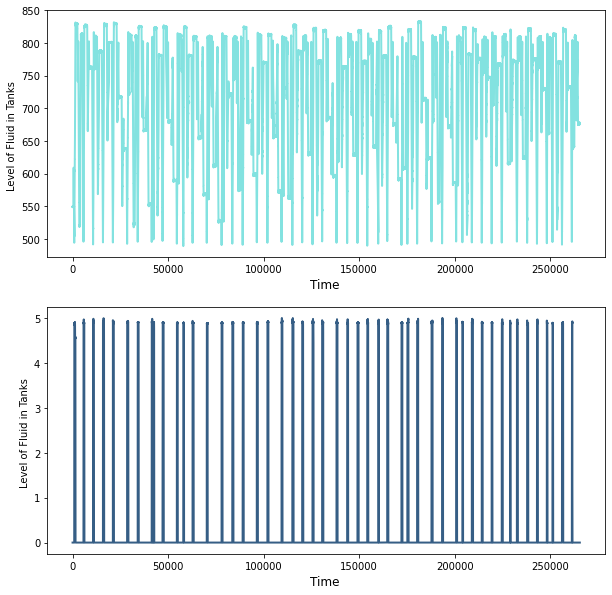

In [8]:
cols = ["LIT101.Pv","FIT101.Pv"]
plot_values(p1_state,cols,10)

array([[<Axes: title={'center': 'P1_STATE'}>,
        <Axes: title={'center': 'LIT101.Pv'}>],
       [<Axes: title={'center': 'FIT101.Pv'}>,
        <Axes: title={'center': 'MV101.Status'}>],
       [<Axes: title={'center': 'P101.Status'}>,
        <Axes: title={'center': 'P102.Status'}>]], dtype=object)

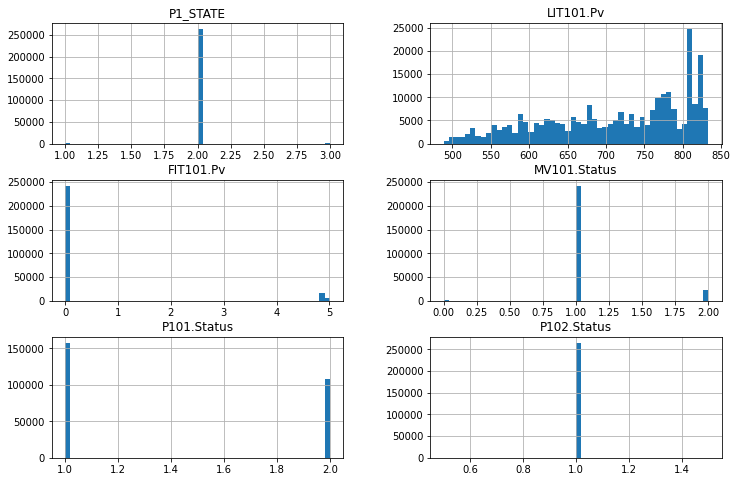

In [9]:
p1_state.hist(bins = 50,figsize=(12, 8))

In [10]:
# Correlation Matrix
#corr_matrix = p1_state.corr(numeric_only=True)
#corr_matrix['FIT101.Pv']

In [11]:

# Scatter Matrix
#attributes = p1_state.columns
#scatter_matrix(p1_state[attributes],figsize = (20,16))



### P2 State

In [12]:
p2_state = data[['t_stamp','P2_STATE','FIT201.Pv', 'AIT201.Pv','AIT202.Pv', 'AIT203.Pv', 'MV201.Status', 'P201.Status', 
                'P202.Status','P203.Status', 'P204.Status', 'P205.Status', 'P206.Status','P207.Status', 'P208.Status',
                  'LS201.Alarm', 'LS202.Alarm','LSL203.Alarm', 'LSLL203.Alarm']]
p2_state.head()

,t_stamp,P2_STATE,FIT201.Pv,AIT201.Pv,AIT202.Pv,AIT203.Pv,MV201.Status,P201.Status,P202.Status,P203.Status,P204.Status,P205.Status,P206.Status,P207.Status,P208.Status,LS201.Alarm,LS202.Alarm,LSL203.Alarm,LSLL203.Alarm
0,2024-04-23 09:15:00,1,0.0,230.197388,7.737632,212.458344,1,1,1,1,1,1,1,1,1,Inactive,Inactive,Inactive,Inactive
1,2024-04-23 09:15:01,1,0.0,230.005127,7.748847,212.458344,1,1,1,1,1,1,1,1,1,Inactive,Inactive,Inactive,Inactive
2,2024-04-23 09:15:02,1,0.0,230.005127,7.764227,212.330170,1,1,1,1,1,1,1,1,1,Inactive,Inactive,Inactive,Inactive
3,2024-04-23 09:15:03,1,0.0,230.005127,7.778967,212.253265,1,1,1,1,1,1,1,1,1,Inactive,Inactive,Inactive,Inactive
4,2024-04-23 09:15:04,1,0.0,230.005127,7.793066,212.253265,1,1,1,1,1,1,1,1,1,Inactive,Inactive,Inactive,Inactive


array([[<Axes: title={'center': 'P2_STATE'}>,
        <Axes: title={'center': 'FIT201.Pv'}>,
        <Axes: title={'center': 'AIT201.Pv'}>,
        <Axes: title={'center': 'AIT202.Pv'}>],
       [<Axes: title={'center': 'AIT203.Pv'}>,
        <Axes: title={'center': 'MV201.Status'}>,
        <Axes: title={'center': 'P201.Status'}>,
        <Axes: title={'center': 'P202.Status'}>],
       [<Axes: title={'center': 'P203.Status'}>,
        <Axes: title={'center': 'P204.Status'}>,
        <Axes: title={'center': 'P205.Status'}>,
        <Axes: title={'center': 'P206.Status'}>],
       [<Axes: title={'center': 'P207.Status'}>,
        <Axes: title={'center': 'P208.Status'}>, <Axes: >, <Axes: >]],
      dtype=object)

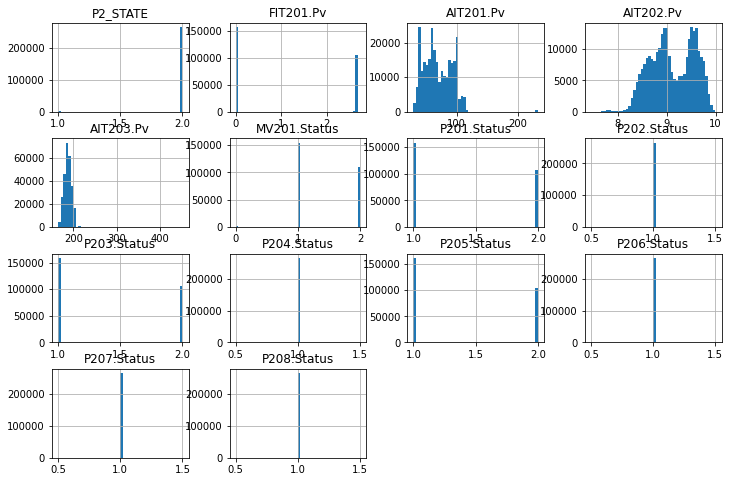

In [13]:
p2_state.hist(bins = 50,figsize=(12, 8))

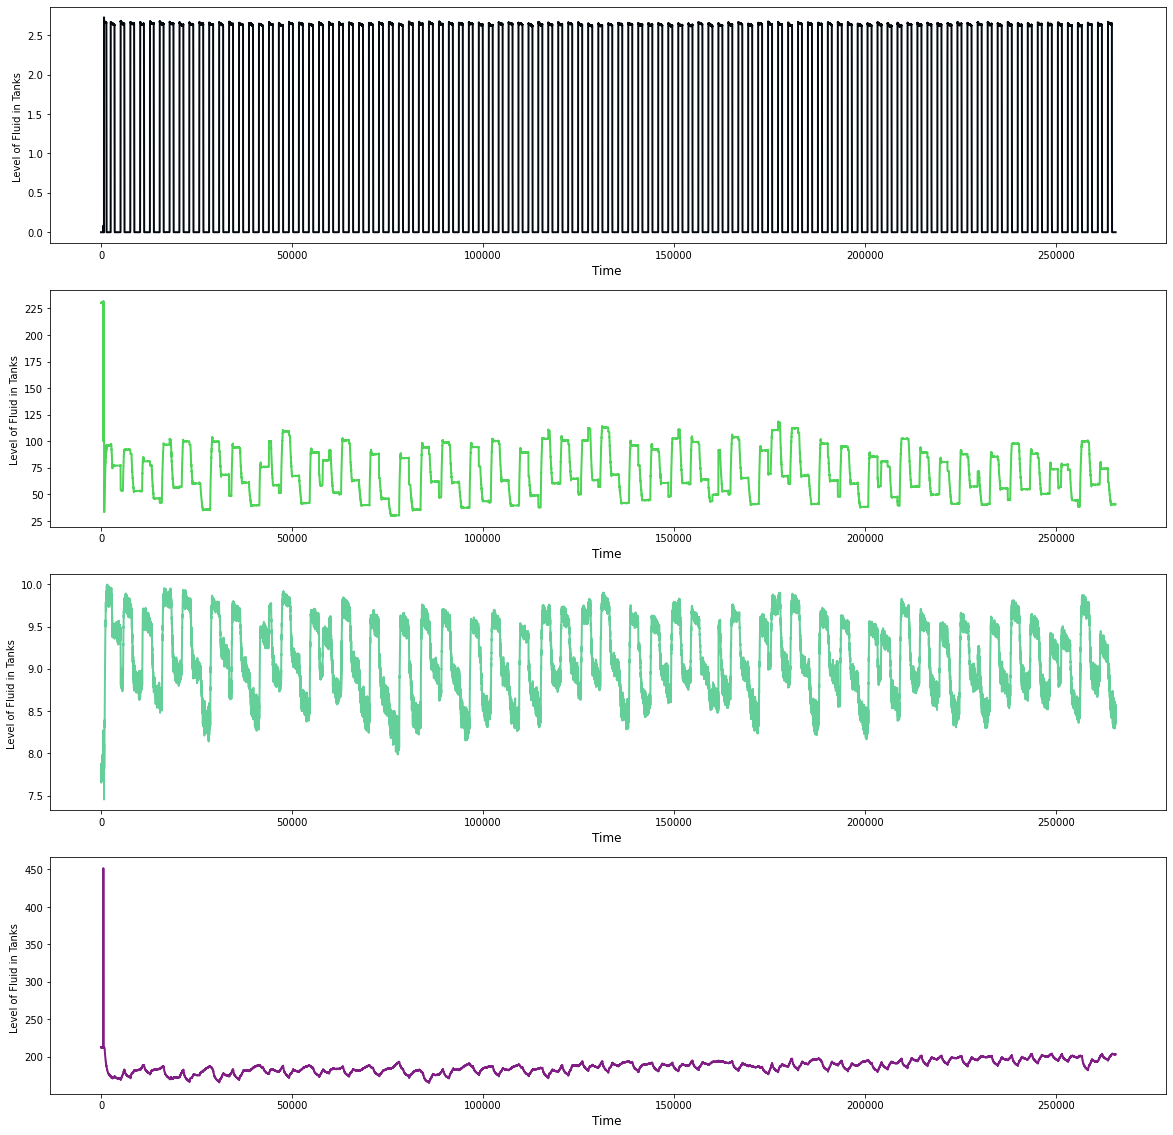

In [14]:
cols = ['FIT201.Pv', 'AIT201.Pv','AIT202.Pv', 'AIT203.Pv']
plot_values(p2_state,cols,20)

### P3 State

In [15]:
p3_state = data[['t_stamp','P3_STATE','AIT301.Pv', 'AIT302.Pv','AIT303.Pv', 'LIT301.Pv', 'FIT301.Pv', 'DPIT301.Pv', 'MV301.Status',
                 'MV302.Status', 'MV303.Status', 'MV304.Status', 'P301.Status','P302.Status']]
p3_state.head()

,t_stamp,P3_STATE,AIT301.Pv,AIT302.Pv,AIT303.Pv,LIT301.Pv,FIT301.Pv,DPIT301.Pv,MV301.Status,MV302.Status,MV303.Status,MV304.Status,P301.Status,P302.Status
0,2024-04-23 09:15:00,1,7.052212,252.564178,20.199757,678.1514,0.000384,3.105192,1,1,1,1,1,1
1,2024-04-23 09:15:01,1,7.052212,252.564178,20.199757,678.1514,0.000384,3.105192,1,1,1,1,1,1
2,2024-04-23 09:15:02,1,7.052212,252.564178,20.199757,678.1514,0.000384,3.105192,1,1,1,1,1,1
3,2024-04-23 09:15:03,1,7.052212,252.564178,20.199757,678.1514,0.000384,3.105192,1,1,1,1,1,1
4,2024-04-23 09:15:04,1,7.052212,252.564178,20.199757,678.1514,0.000384,3.105192,1,1,1,1,1,1


array([[<Axes: title={'center': 'P3_STATE'}>,
        <Axes: title={'center': 'AIT301.Pv'}>,
        <Axes: title={'center': 'AIT302.Pv'}>,
        <Axes: title={'center': 'AIT303.Pv'}>],
       [<Axes: title={'center': 'LIT301.Pv'}>,
        <Axes: title={'center': 'FIT301.Pv'}>,
        <Axes: title={'center': 'DPIT301.Pv'}>,
        <Axes: title={'center': 'MV301.Status'}>],
       [<Axes: title={'center': 'MV302.Status'}>,
        <Axes: title={'center': 'MV303.Status'}>,
        <Axes: title={'center': 'MV304.Status'}>,
        <Axes: title={'center': 'P301.Status'}>],
       [<Axes: title={'center': 'P302.Status'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

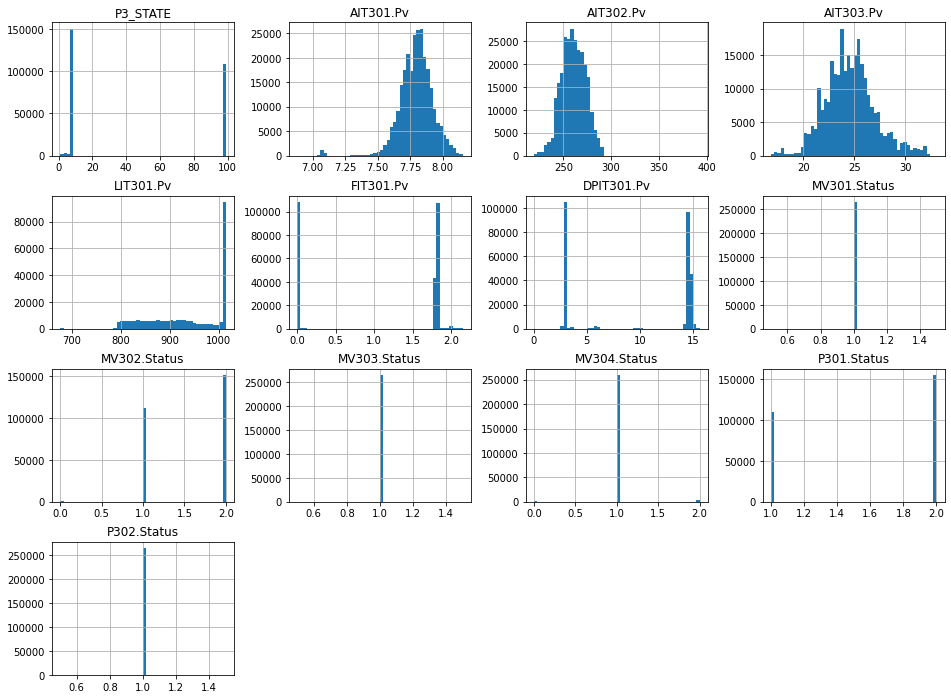

In [16]:
p3_state.hist(bins = 50,figsize=(16, 12))

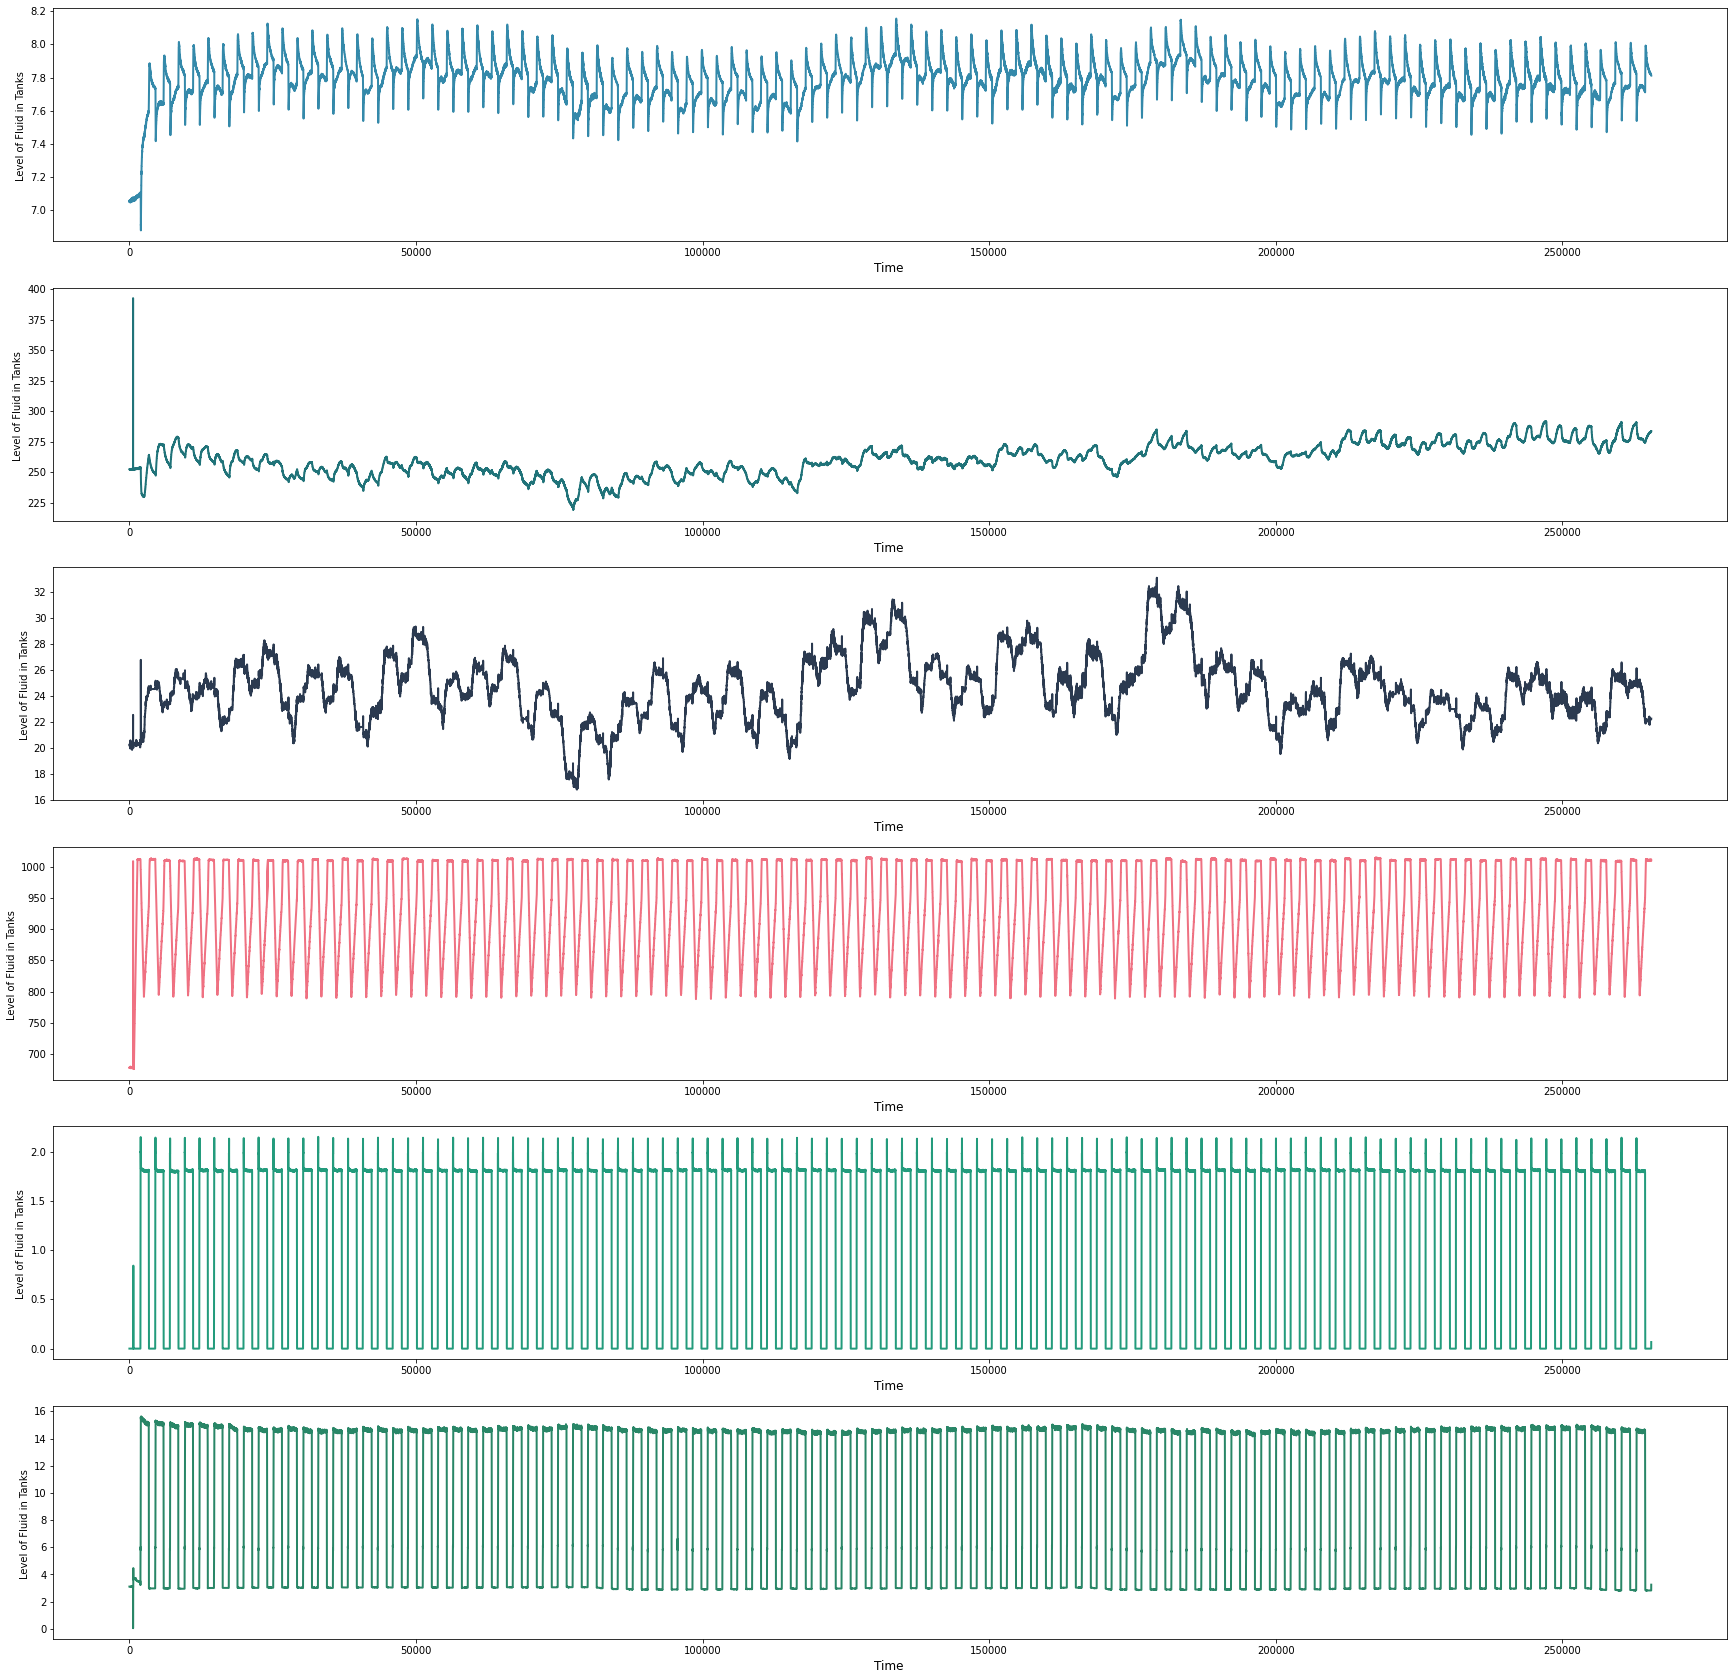

In [17]:
cols = ['AIT301.Pv', 'AIT302.Pv','AIT303.Pv', 'LIT301.Pv', 'FIT301.Pv', 'DPIT301.Pv']
plot_values(p3_state,cols,30)

### P4 State

In [18]:
p4_state = data[['t_stamp','P4_STATE', 'LIT401.Pv', 'FIT401.Pv', 'AIT401.Pv','AIT402.Pv', 'P401.Status', 'P402.Status',
                  'P403.Status', 'P404.Status', 'UV401.Status', 'LS401.Alarm']]
p4_state.head()

,t_stamp,P4_STATE,LIT401.Pv,FIT401.Pv,AIT401.Pv,AIT402.Pv,P401.Status,P402.Status,P403.Status,P404.Status,UV401.Status,LS401.Alarm
0,2024-04-23 09:15:00,1,1008.85669,0.000512,0,242.21994,1,1,1,1,1,Inactive
1,2024-04-23 09:15:01,1,1009.04895,0.000512,0,242.21994,1,1,1,1,1,Inactive
2,2024-04-23 09:15:02,1,1009.27966,0.000512,0,242.21994,1,1,1,1,1,Inactive
3,2024-04-23 09:15:03,1,1009.43347,0.000512,0,242.21994,1,1,1,1,1,Inactive
4,2024-04-23 09:15:04,1,1009.70264,0.000512,0,242.21994,1,1,1,1,1,Inactive


array([[<Axes: title={'center': 'P4_STATE'}>,
        <Axes: title={'center': 'LIT401.Pv'}>,
        <Axes: title={'center': 'FIT401.Pv'}>],
       [<Axes: title={'center': 'AIT401.Pv'}>,
        <Axes: title={'center': 'AIT402.Pv'}>,
        <Axes: title={'center': 'P401.Status'}>],
       [<Axes: title={'center': 'P402.Status'}>,
        <Axes: title={'center': 'P403.Status'}>,
        <Axes: title={'center': 'P404.Status'}>],
       [<Axes: title={'center': 'UV401.Status'}>, <Axes: >, <Axes: >]],
      dtype=object)

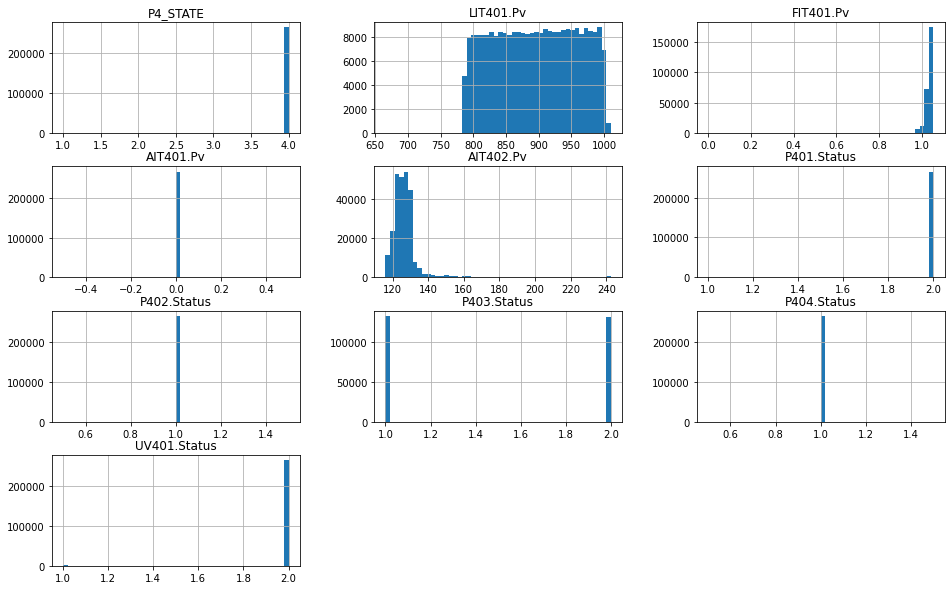

In [19]:
p4_state.hist(bins = 50,figsize=(16, 10))

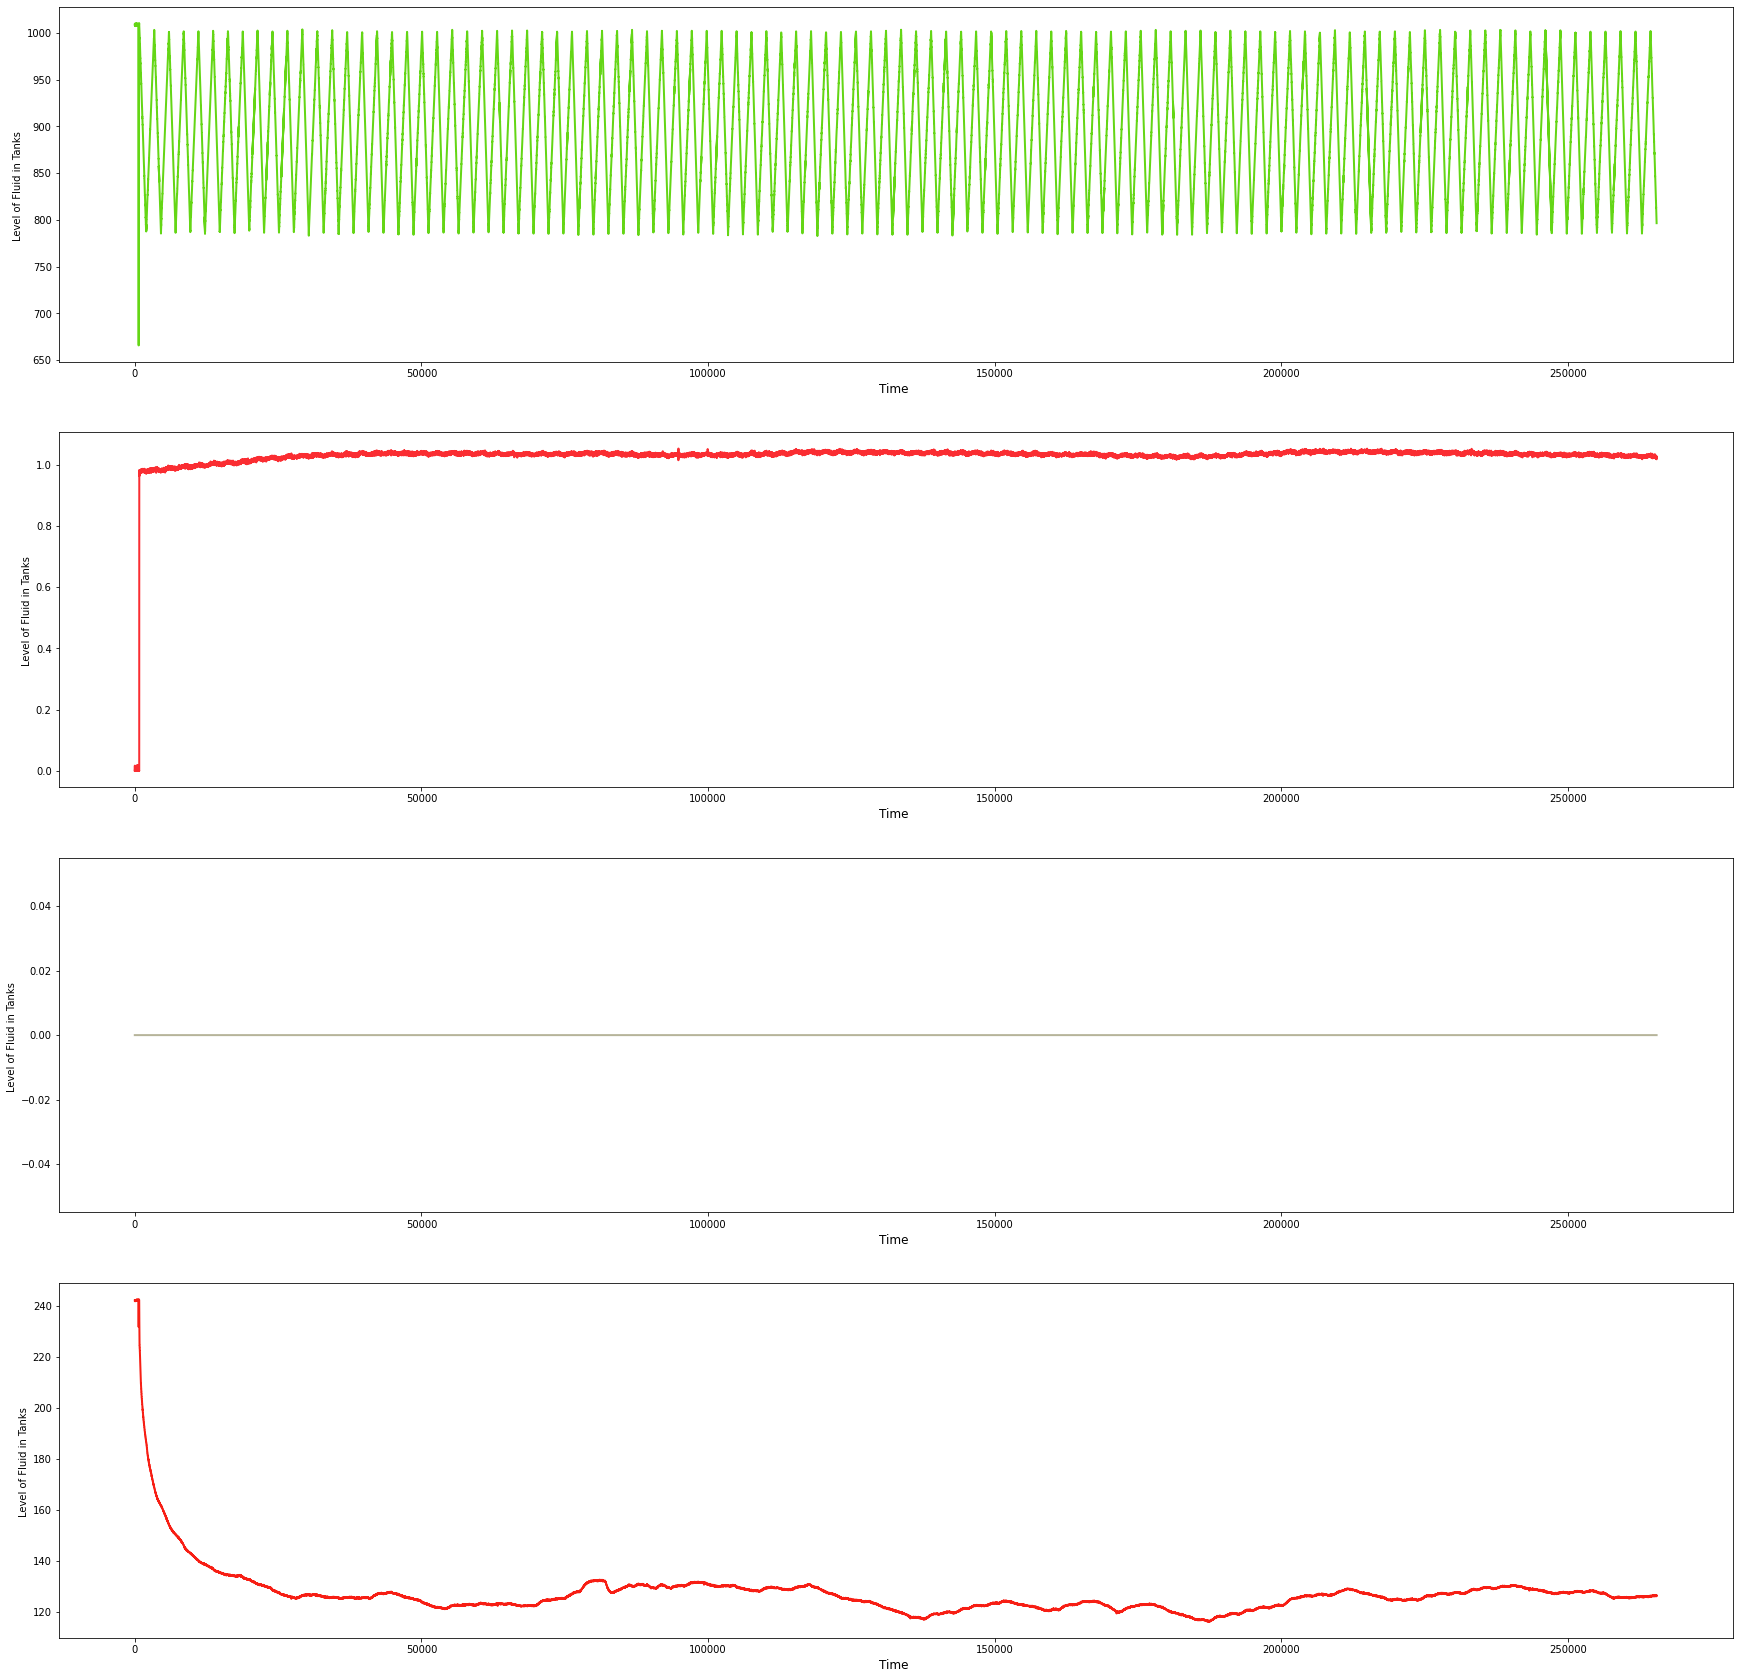

In [20]:
cols = ['LIT401.Pv', 'FIT401.Pv', 'AIT401.Pv','AIT402.Pv']
plot_values(p4_state,cols,30)

### P5 State

In [21]:
p5_state = data[['t_stamp','P5_STATE', 'FIT501.Pv', 'FIT502.Pv','FIT503.Pv', 'FIT504.Pv', 'AIT501.Pv', 'AIT502.Pv', 'AIT503.Pv',
                 'AIT504.Pv', 'PIT501.Pv', 'PIT502.Pv', 'PIT503.Pv', 'P501.Status','P501.Speed', 'P502.Status', 'P502.Speed',
                   'MV501.Status','MV502.Status', 'MV503.Status', 'MV504.Status']]
p5_state.head()

,t_stamp,P5_STATE,FIT501.Pv,FIT502.Pv,FIT503.Pv,FIT504.Pv,AIT501.Pv,AIT502.Pv,AIT503.Pv,AIT504.Pv,...,PIT502.Pv,PIT503.Pv,P501.Status,P501.Speed,P502.Status,P502.Speed,MV501.Status,MV502.Status,MV503.Status,MV504.Status
0,2024-04-23 09:15:00,1,0.002948,0.001921,0.001536,0.0,7.191297,356.5496,127.755707,14.842348,...,30.51613,27.79736,1,0,1,0,1,1,1,1
1,2024-04-23 09:15:01,1,0.002948,0.001921,0.001536,0.0,7.196104,356.5496,127.755707,14.842348,...,30.51613,27.79736,1,0,1,0,1,1,1,1
2,2024-04-23 09:15:02,1,0.002948,0.001921,0.001536,0.0,7.197065,356.5496,127.755707,14.842348,...,30.51613,27.79736,1,0,1,0,1,1,1,1
3,2024-04-23 09:15:03,1,0.002948,0.001921,0.001536,0.0,7.201551,356.5496,127.755707,14.842348,...,30.51613,27.79736,1,0,1,0,1,1,1,1
4,2024-04-23 09:15:04,1,0.002948,0.001921,0.001536,0.0,7.201551,356.5496,127.755707,14.842348,...,30.51613,27.79736,1,0,1,0,1,1,1,1


array([[<Axes: title={'center': 'P5_STATE'}>,
        <Axes: title={'center': 'FIT501.Pv'}>,
        <Axes: title={'center': 'FIT502.Pv'}>,
        <Axes: title={'center': 'FIT503.Pv'}>],
       [<Axes: title={'center': 'FIT504.Pv'}>,
        <Axes: title={'center': 'AIT501.Pv'}>,
        <Axes: title={'center': 'AIT502.Pv'}>,
        <Axes: title={'center': 'AIT503.Pv'}>],
       [<Axes: title={'center': 'AIT504.Pv'}>,
        <Axes: title={'center': 'PIT501.Pv'}>,
        <Axes: title={'center': 'PIT502.Pv'}>,
        <Axes: title={'center': 'PIT503.Pv'}>],
       [<Axes: title={'center': 'P501.Status'}>,
        <Axes: title={'center': 'P501.Speed'}>,
        <Axes: title={'center': 'P502.Status'}>,
        <Axes: title={'center': 'P502.Speed'}>],
       [<Axes: title={'center': 'MV501.Status'}>,
        <Axes: title={'center': 'MV502.Status'}>,
        <Axes: title={'center': 'MV503.Status'}>,
        <Axes: title={'center': 'MV504.Status'}>]], dtype=object)

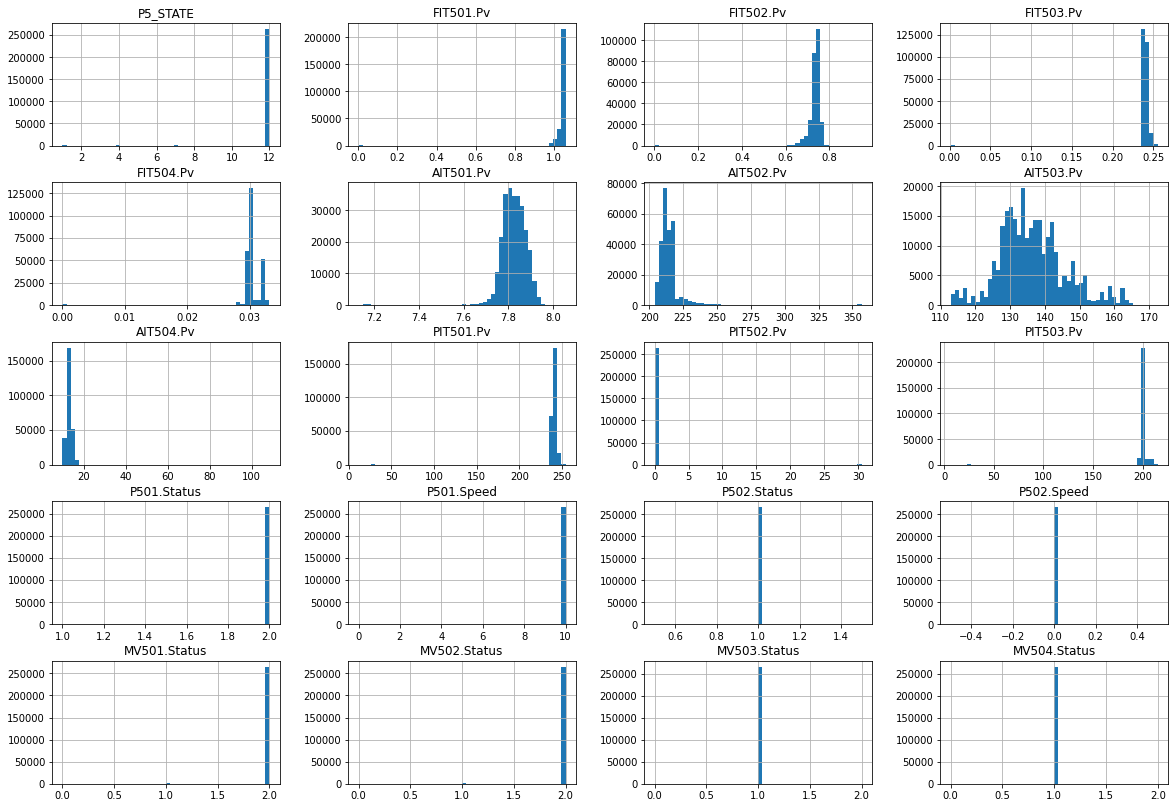

In [22]:
p5_state.hist(bins = 50,figsize=(20, 14))

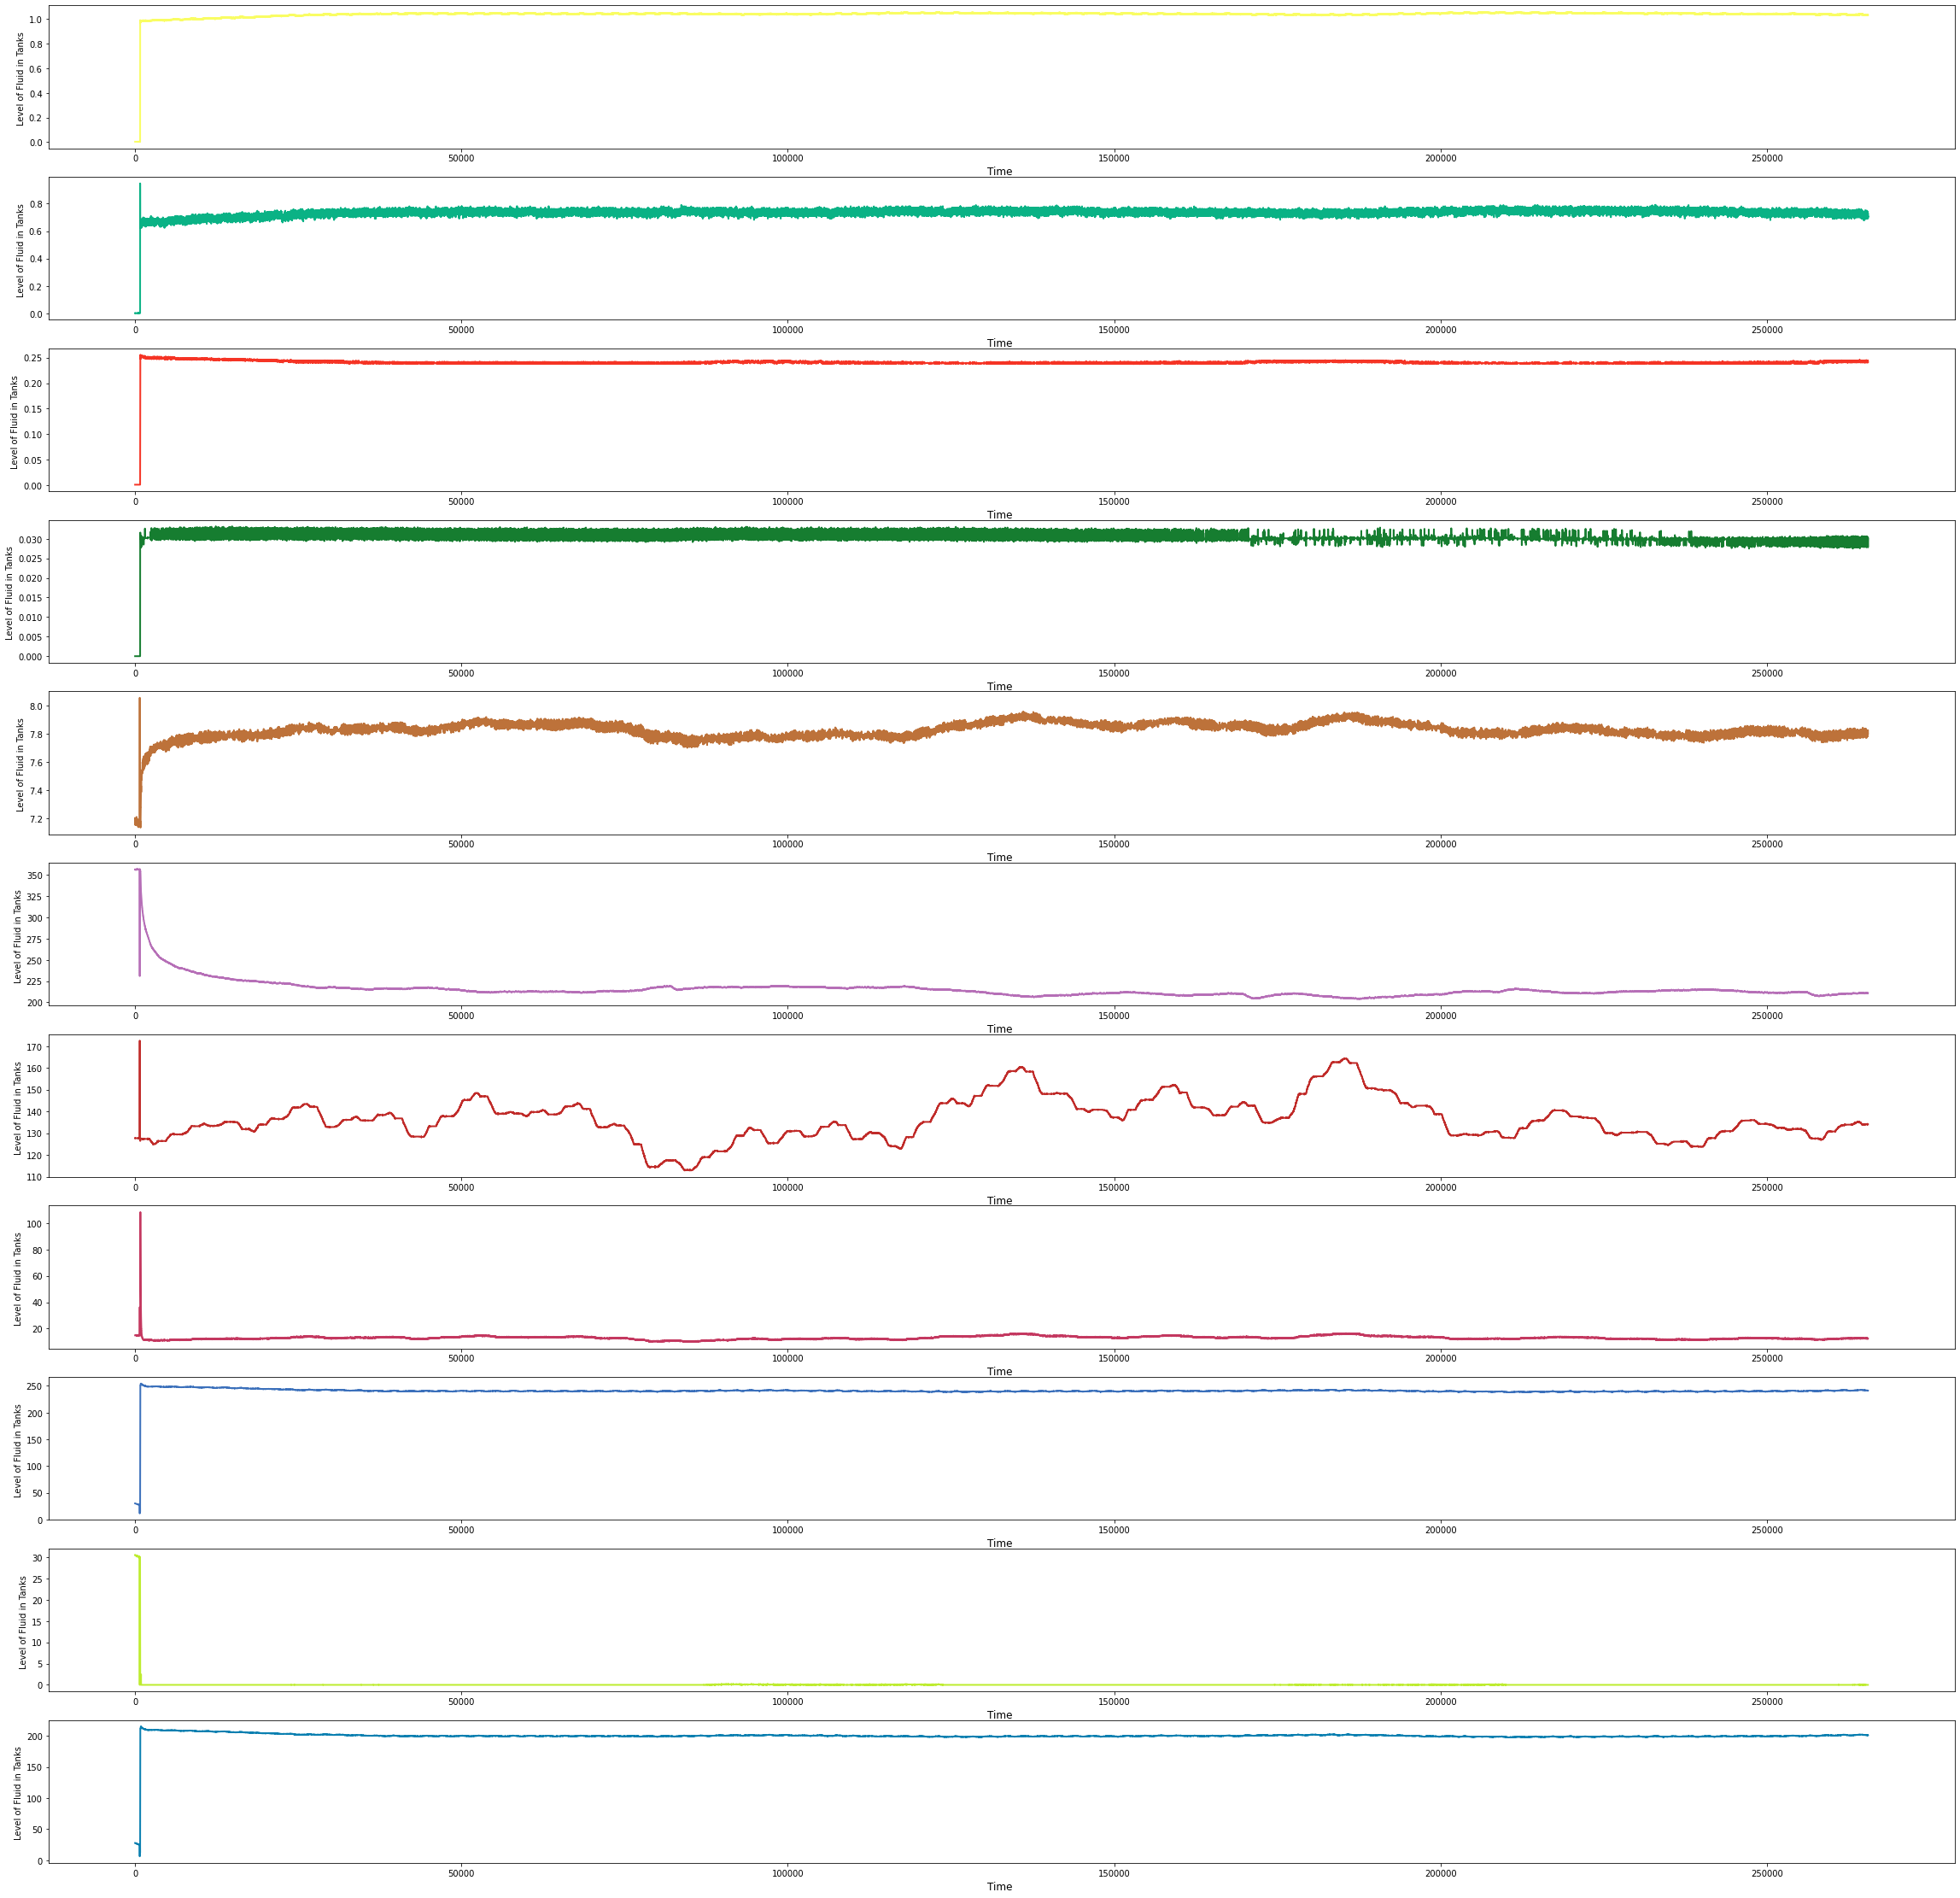

In [23]:
cols = [ 'FIT501.Pv', 'FIT502.Pv','FIT503.Pv', 'FIT504.Pv', 'AIT501.Pv', 'AIT502.Pv', 'AIT503.Pv',
        'AIT504.Pv', 'PIT501.Pv', 'PIT502.Pv', 'PIT503.Pv']
plot_values(p5_state,cols,40)

### P6 State

In [24]:
p6_state = data[['t_stamp','P6_STATE', 'LIT601.Pv','LIT602.Pv', 'FIT601.Pv', 'FIT602.Pv', 'P601.Status', 'P602.Status',
                 'P603.Status', 'LSH601.Alarm', 'LSL601.Alarm', 'LSH602.Alarm','LSL602.Alarm', 'LSH603.Alarm', 'LSL603.Alarm']]
p6_state.head()

,t_stamp,P6_STATE,LIT601.Pv,LIT602.Pv,FIT601.Pv,FIT602.Pv,P601.Status,P602.Status,P603.Status,LSH601.Alarm,LSL601.Alarm,LSH602.Alarm,LSL602.Alarm,LSH603.Alarm,LSL603.Alarm
0,2024-04-23 09:15:00,1,468.693939,543.418335,0.0,1.017204,1,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active
1,2024-04-23 09:15:01,1,468.693939,543.418335,0.0,1.005511,1,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active
2,2024-04-23 09:15:02,1,468.693939,543.418335,0.0,1.005511,1,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active
3,2024-04-23 09:15:03,1,468.693939,543.418335,0.0,1.013200,1,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active
4,2024-04-23 09:15:04,1,468.693939,543.418335,0.0,1.009515,1,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active


array([[<Axes: title={'center': 'P6_STATE'}>,
        <Axes: title={'center': 'LIT601.Pv'}>,
        <Axes: title={'center': 'LIT602.Pv'}>],
       [<Axes: title={'center': 'FIT601.Pv'}>,
        <Axes: title={'center': 'FIT602.Pv'}>,
        <Axes: title={'center': 'P601.Status'}>],
       [<Axes: title={'center': 'P602.Status'}>,
        <Axes: title={'center': 'P603.Status'}>, <Axes: >]], dtype=object)

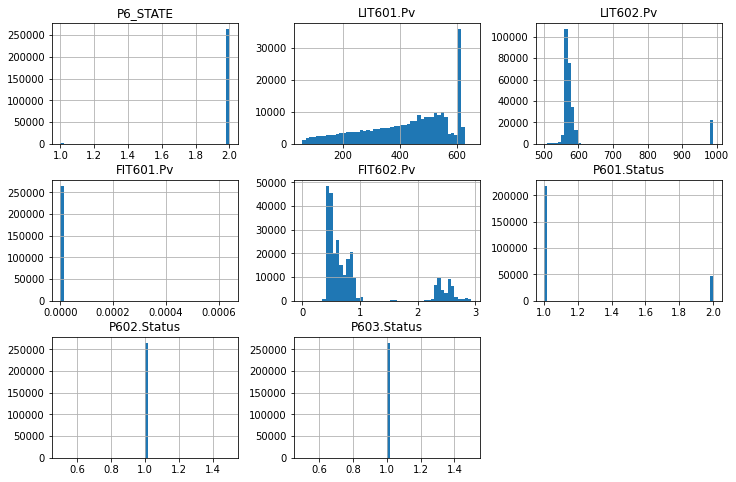

In [25]:
p6_state.hist(bins = 50,figsize=(12, 8))

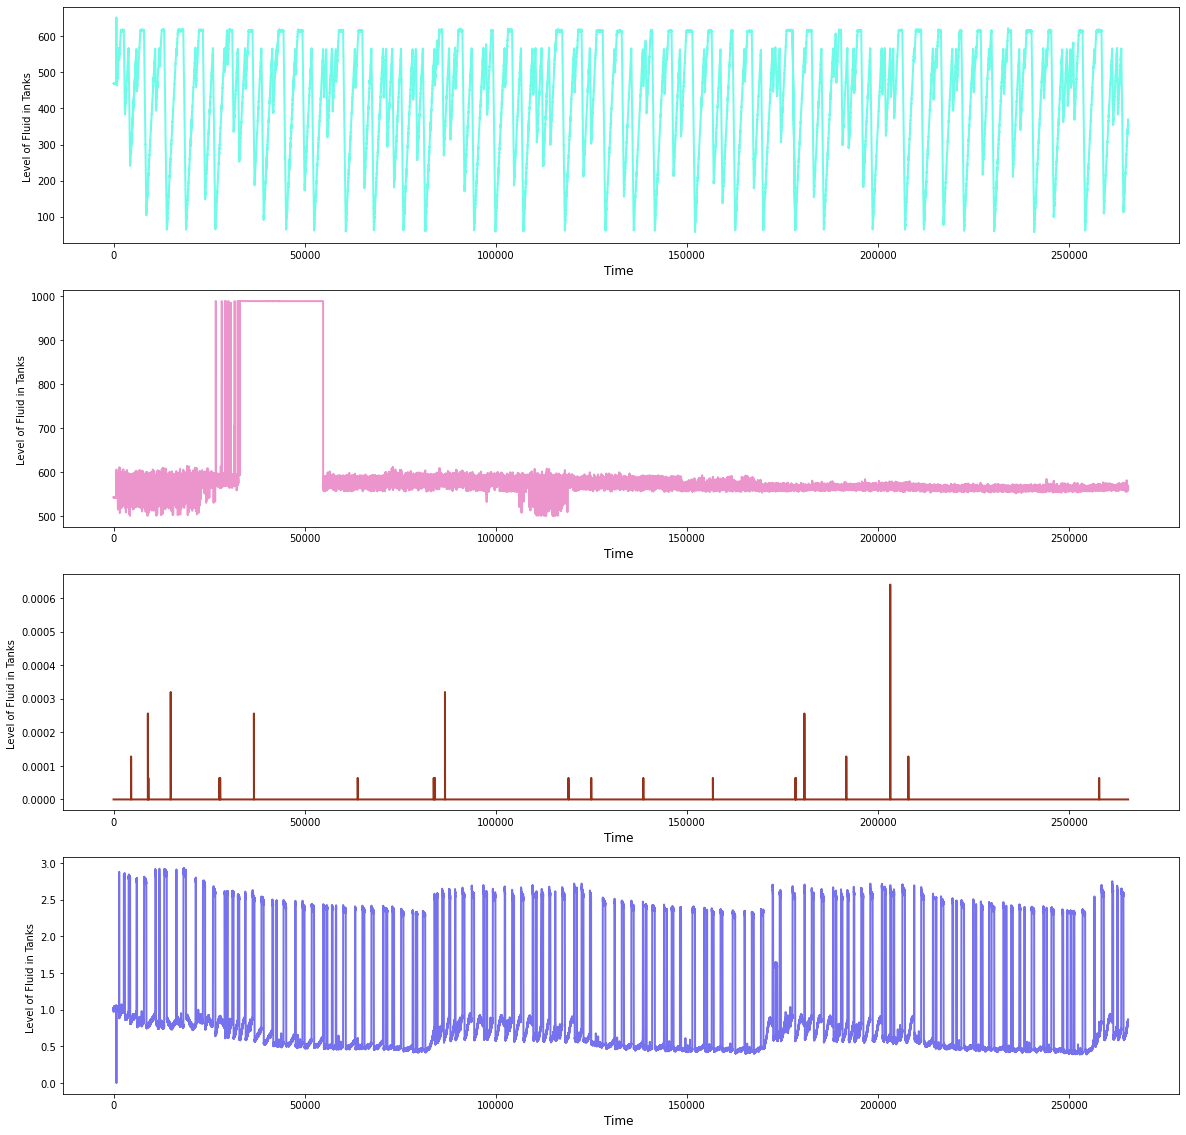

In [26]:
cols = ['LIT601.Pv','LIT602.Pv', 'FIT601.Pv', 'FIT602.Pv']
plot_values(p6_state,cols,20)

## Observations 
* From my observation, all the columns with float64 datatype have a scalar value and these need to be scaled in the range (0,1). 
* All the int64 values are categorical some ranging from (0,5)
* We need to encode them so as to use for training. 
* All the columns which has *.Alarm can be considered as the output variables. We probably need to categorize them into 0,1.
* For more understanding on the data, we need to correlation plots between the int, float columns with the Alarm columns.  

In [27]:
int_df = data.select_dtypes(include='int64')
print(int_df.columns)
float_df = data.select_dtypes(include='float64')
print(float_df.columns)
alarm = data.select_dtypes(include='object')
print(alarm.columns)

Index(['P1_STATE', 'MV101.Status', 'P101.Status', 'P102.Status', 'P2_STATE',
       'MV201.Status', 'P201.Status', 'P202.Status', 'P203.Status',
       'P204.Status', 'P205.Status', 'P206.Status', 'P207.Status',
       'P208.Status', 'P3_STATE', 'MV301.Status', 'MV302.Status',
       'MV303.Status', 'MV304.Status', 'P301.Status', 'P302.Status',
       'P4_STATE', 'AIT401.Pv', 'P401.Status', 'P402.Status', 'P403.Status',
       'P404.Status', 'UV401.Status', 'P5_STATE', 'P501.Status', 'P501.Speed',
       'P502.Status', 'P502.Speed', 'MV501.Status', 'MV502.Status',
       'MV503.Status', 'MV504.Status', 'P6_STATE', 'P601.Status',
       'P602.Status', 'P603.Status'],
      dtype='object')
Index(['LIT101.Pv', 'FIT101.Pv', 'FIT201.Pv', 'AIT201.Pv', 'AIT202.Pv',
       'AIT203.Pv', 'AIT301.Pv', 'AIT302.Pv', 'AIT303.Pv', 'LIT301.Pv',
       'FIT301.Pv', 'DPIT301.Pv', 'LIT401.Pv', 'FIT401.Pv', 'AIT402.Pv',
       'FIT501.Pv', 'FIT502.Pv', 'FIT503.Pv', 'FIT504.Pv', 'AIT501.Pv',
       'AIT502